In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# EASY 2

### Исследование логистического отображения

**Логистическое отображение** — это простейшая модель динамической системы с нелинейностью, задаваемая рекуррентным соотношением:

$$
x_{n+1} = f(x_n) = r \cdot x_n \cdot (1 - x_n)
$$

где:
- $x_n$ — нормированная численность популяции в момент времени $n$ ($0 \leq x_n \leq 1$)
- $r$ — управляющий параметр, характеризующий скорость роста популяции ($0 \leq r \leq 4$)

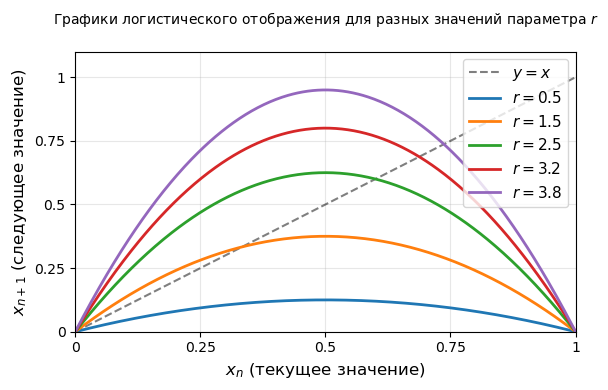

In [2]:
# Функция логистического отображения
def logistic_map(x, r):
    """
    Вычисляет значение логистического отображения.
    
    Параметры:
    x: текущее значение (от 0 до 1)
    r: параметр роста (от 0 до 4)
    
    Возвращает:
    следующее значение x_{n+1}
    """
    return r * x * (1 - x)


x = np.linspace(0, 1, 500)  
r_values = [0.5, 1.5, 2.5, 3.2, 3.8]
plt.figure(figsize=(6, 4))

plt.plot(x, x, 'k--', alpha=0.5, label='$y = x$')

for r in r_values:
    y = logistic_map(x, r)
    plt.plot(x, y, linewidth=2, label=f'$r = {r}$')

plt.xlabel('$x_n$ (текущее значение)', fontsize=12)
plt.ylabel('$x_{n+1}$ (следующее значение)', fontsize=12)
plt.title('Графики логистического отображения для разных значений параметра $r$', fontsize=10, pad=20)


plt.xlim([0, 1])
plt.ylim([0, 1.1])  
plt.grid(True, alpha=0.3)
plt.legend(loc='upper right', fontsize=11)
plt.xticks([0, 0.25, 0.5, 0.75, 1.0], ['0', '0.25', '0.5', '0.75', '1'])
plt.yticks([0, 0.25, 0.5, 0.75, 1.0], ['0', '0.25', '0.5', '0.75', '1'])
plt.tight_layout()
plt.show()

Режим 1: вымирание r = 0.5


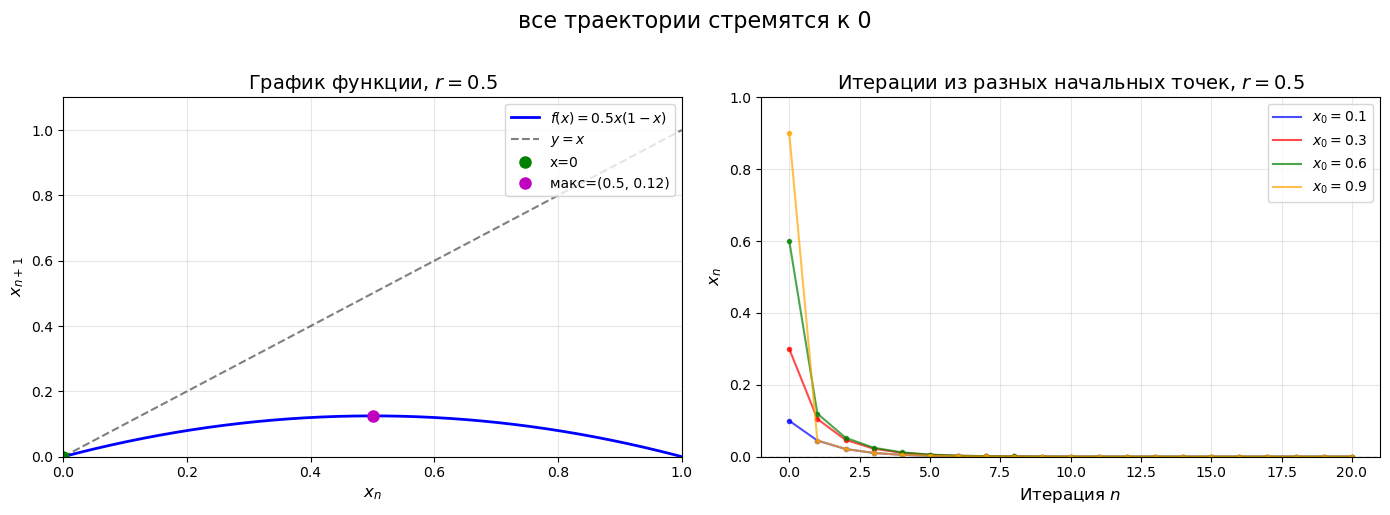

Режим 2: r = 1.5


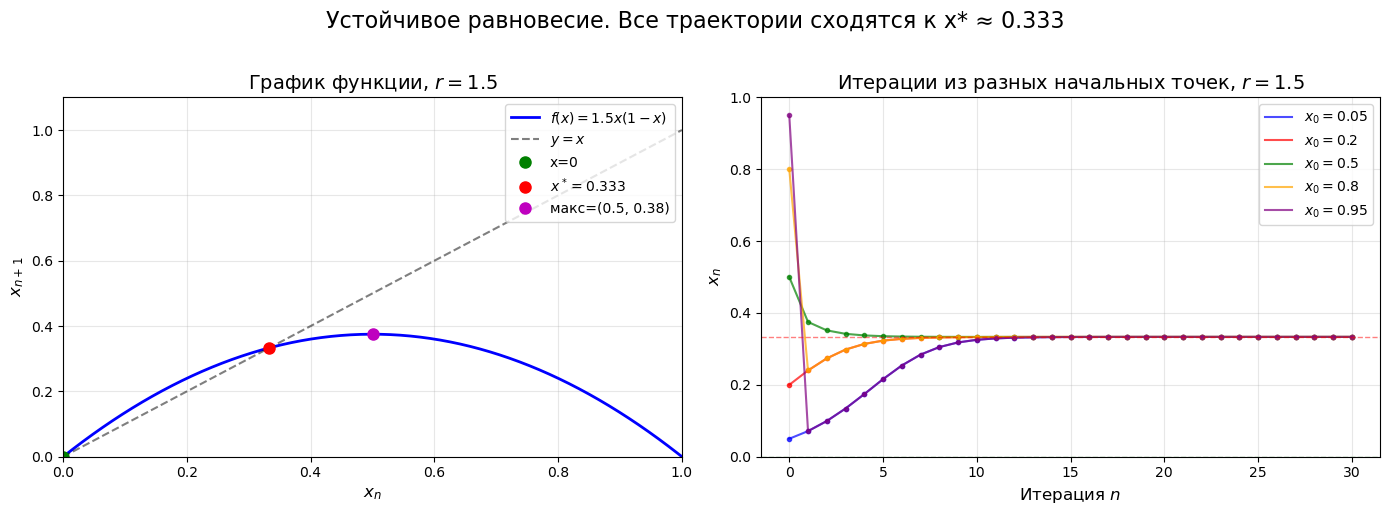

Режим 2: r = 2.5


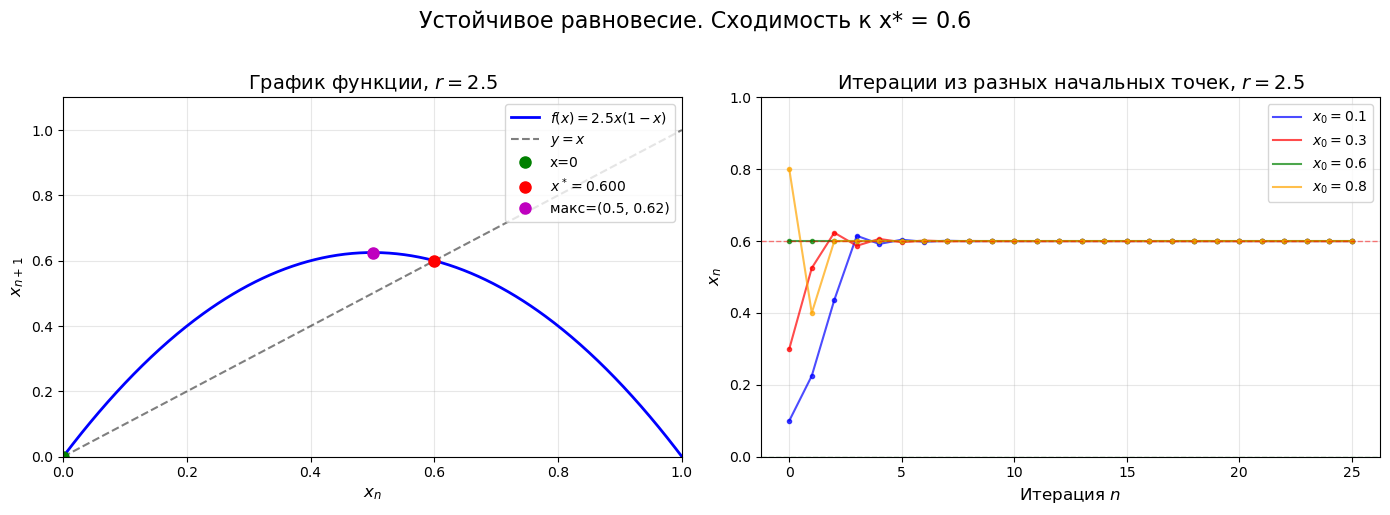

Режим 3: r = 3.0


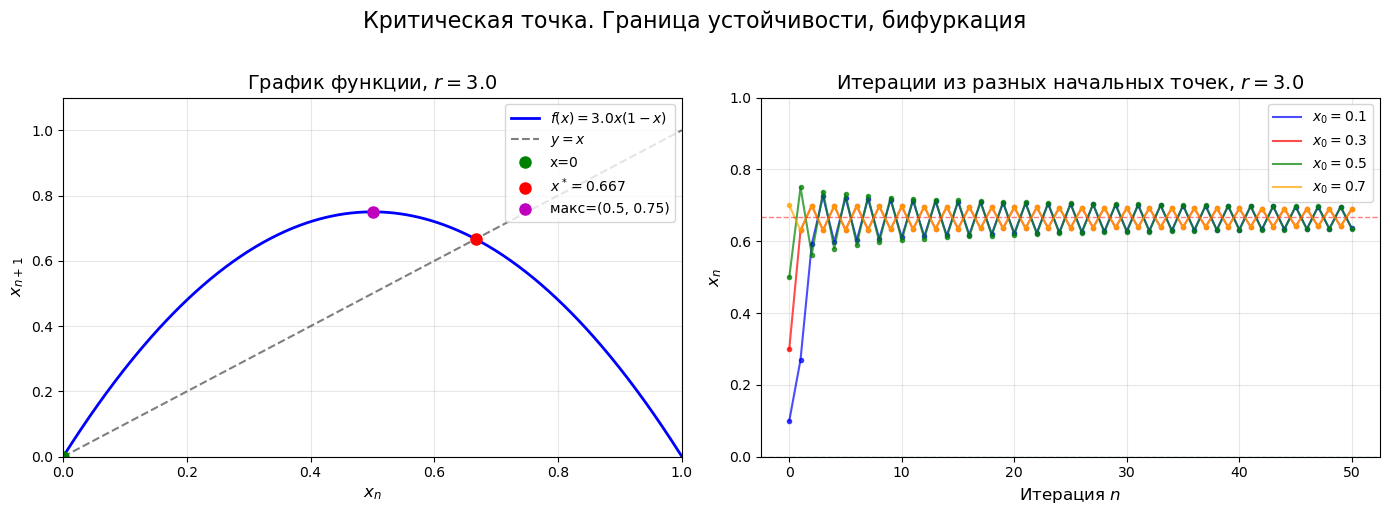

Режим 4: r = 3.2


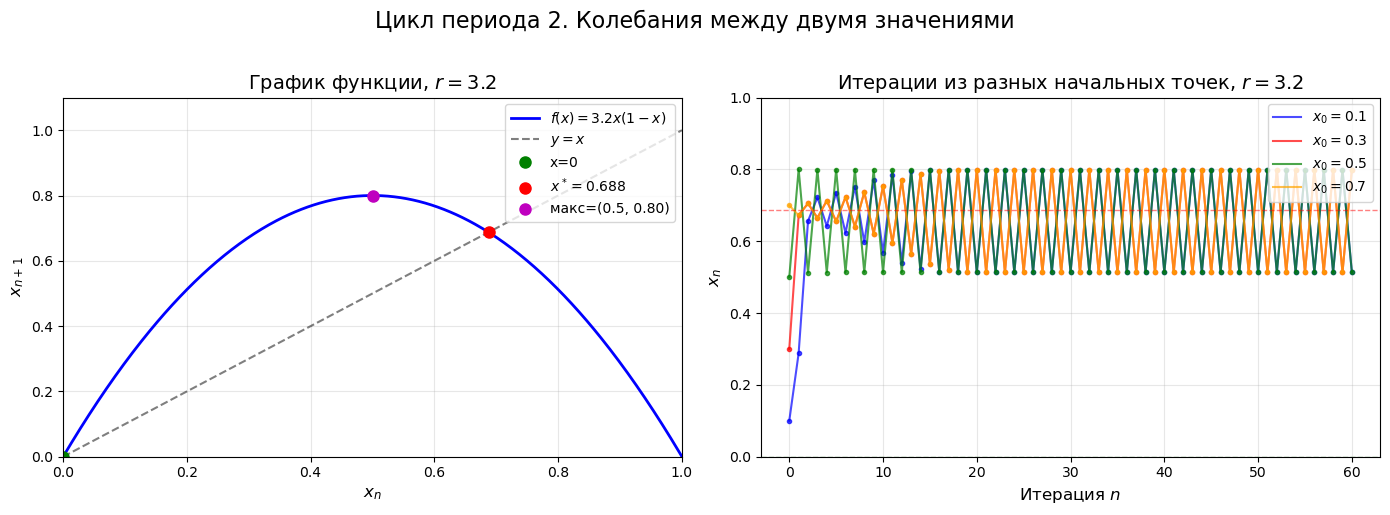

Режим 4: r = 3.5


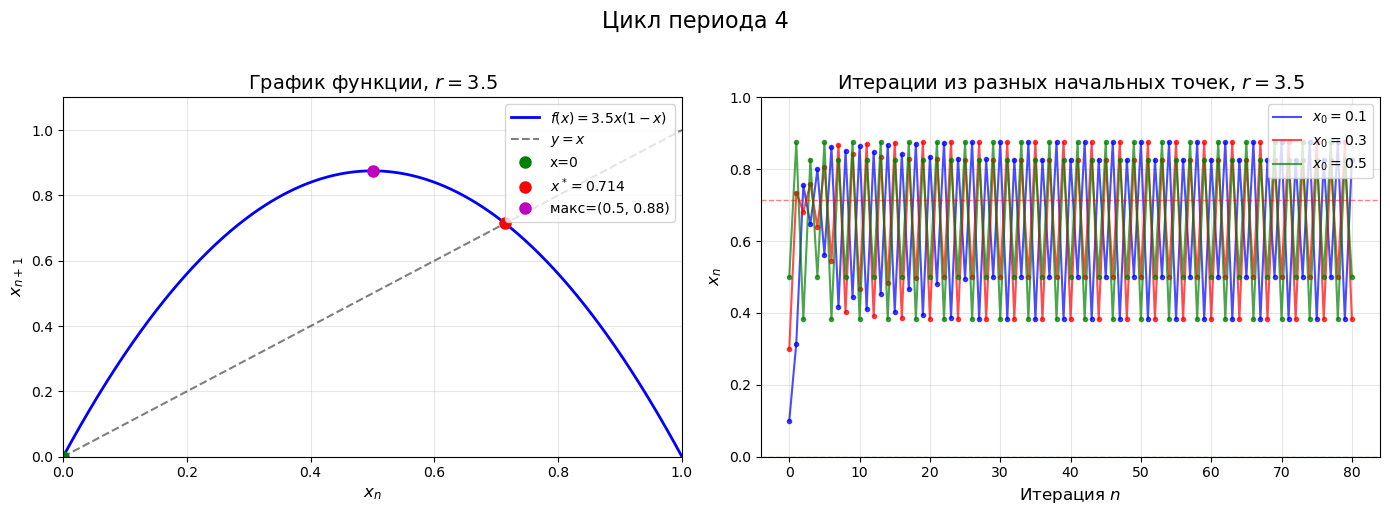

Режим 5: r = 3.8


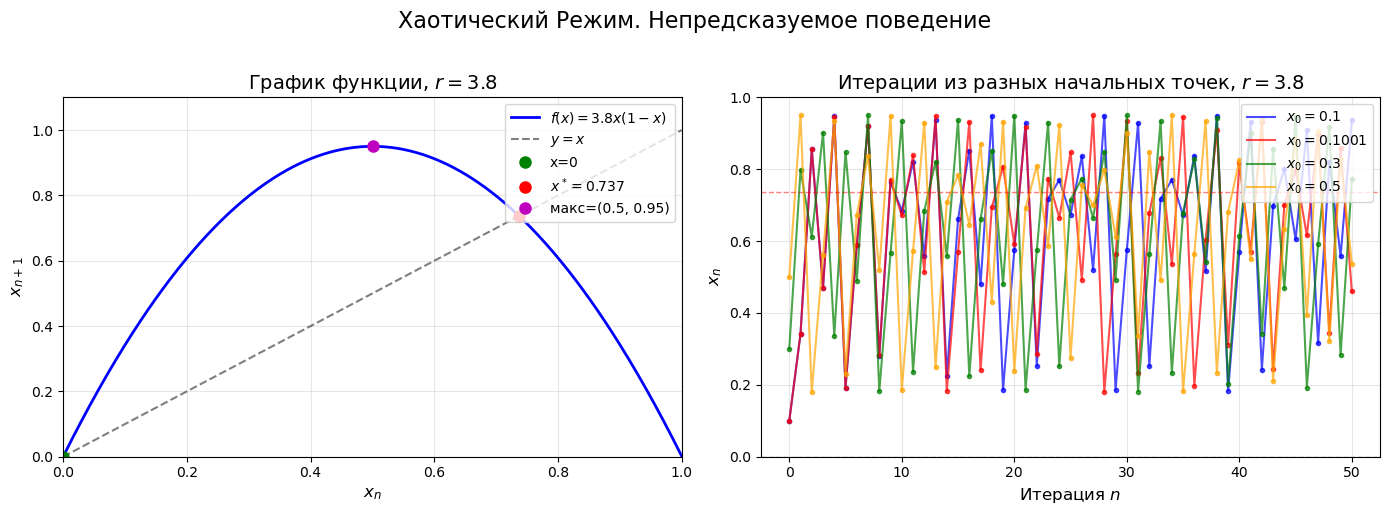

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def plot_r_regime(r, x0_list, n_iterations=30, title=""):
    """
    Построение графиков для конкретного значения r
    
    Параметры:
    r: значение параметра
    x0_list: список начальных значений
    n_iterations: количество итераций
    title: заголовок
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    
    # График 1: Функция f(x) = r*x*(1-x)
    x = np.linspace(0, 1, 500)
    y = r * x * (1 - x)
    
    ax1.plot(x, y, 'b-', linewidth=2, label=f'$f(x) = {r}x(1-x)$')
    ax1.plot(x, x, 'k--', alpha=0.5, label='$y = x$')
    
    # Отмечаем неподвижные точки
    ax1.plot(0, 0, 'go', markersize=8, label='x=0')
    
    # Если r >= 1, есть вторая точка
    if r >= 1:
        x_star = 1 - 1/r
        ax1.plot(x_star, x_star, 'ro', markersize=8, label=f'$x^*={x_star:.3f}$')
    
    x_max = 0.5
    y_max = r * 0.25
    ax1.plot(x_max, y_max, 'mo', markersize=8, label=f'макс=({x_max}, {y_max:.2f})')
    
    ax1.set_xlabel('$x_n$', fontsize=12)
    ax1.set_ylabel('$x_{n+1}$', fontsize=12)
    ax1.set_title(f'График функции, $r={r}$', fontsize=14)
    ax1.grid(True, alpha=0.3)
    ax1.legend(loc='upper right')
    ax1.set_xlim([0, 1])
    ax1.set_ylim([0, 1.1])
    
    # График 2: Итерации из разных начальных точек
    colors = ['b', 'r', 'g', 'orange', 'purple', 'brown']
    
    for i, x0 in enumerate(x0_list):
        trajectory = [x0]
        for _ in range(n_iterations):
            trajectory.append(r * trajectory[-1] * (1 - trajectory[-1]))
        
        color = colors[i % len(colors)]
        ax2.plot(trajectory, '-', color=color, alpha=0.7, linewidth=1.5, 
                label=f'$x_0={x0}$')
        ax2.plot(trajectory, 'o', color=color, markersize=3, alpha=0.7)
    
    ax2.axhline(y=0, color='green', linestyle='--', alpha=0.5, linewidth=1)
    
    if r >= 1:
        ax2.axhline(y=x_star, color='red', linestyle='--', alpha=0.5, linewidth=1)
    
    ax2.set_xlabel('Итерация $n$', fontsize=12)
    ax2.set_ylabel('$x_n$', fontsize=12)
    ax2.set_title(f'Итерации из разных начальных точек, $r={r}$', fontsize=14)
    ax2.grid(True, alpha=0.3)
    ax2.legend(loc='upper right', fontsize=10)
    ax2.set_ylim([0, 1])
    
    plt.suptitle(title, fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()
    


print("Режим 1: вымирание r = 0.5")
x0_list = [0.1, 0.3, 0.6, 0.9]
plot_r_regime(r=0.5, x0_list=x0_list, n_iterations=20, 
              title="все траектории стремятся к 0")

 
print("Режим 2: r = 1.5")
x0_list = [0.05, 0.2, 0.5, 0.8, 0.95]
plot_r_regime(r=1.5, x0_list=x0_list, n_iterations=30,
              title="Устойчивое равновесие. Все траектории сходятся к x* ≈ 0.333")

 
print("Режим 2: r = 2.5")
x0_list = [0.1, 0.3, 0.6, 0.8]
plot_r_regime(r=2.5, x0_list=x0_list, n_iterations=25,
              title="Устойчивое равновесие. Сходимость к x* = 0.6")

 
print("Режим 3: r = 3.0")
x0_list = [0.1, 0.3, 0.5, 0.7]
plot_r_regime(r=3.0, x0_list=x0_list, n_iterations=50,
              title="Критическая точка. Граница устойчивости, бифуркация")

 
print("Режим 4: r = 3.2")
x0_list = [0.1, 0.3, 0.5, 0.7]
plot_r_regime(r=3.2, x0_list=x0_list, n_iterations=60,
              title="Цикл периода 2. Колебания между двумя значениями")
 
print("Режим 4: r = 3.5")
x0_list = [0.1, 0.3, 0.5]
plot_r_regime(r=3.5, x0_list=x0_list, n_iterations=80,
              title="Цикл периода 4")
 
print("Режим 5: r = 3.8")
x0_list = [0.1, 0.1001, 0.3, 0.5]  # Добавим две очень близкие точки
plot_r_regime(r=3.8, x0_list=x0_list, n_iterations=50,
              title="Хаотический Режим. Непредсказуемое поведение")

## Общий вывод о влиянии параметра $r$:
1. **$0 \leq r < 1$:** Система всегда стремится к 0 (вымирание)
   - смертность превышает рождаемость
      
3. **$1 \leq r < 3$:** Существует Устойчивая ненулевая равновесная точка
    - Рождаемость превышает смертность ($r > 1$)
    - Появляется **вторая (ненулевая)** точка равновесия
    - Чем больше $r$, тем больше равновесная популяция $x^*$
    
4. **$r = 3.0$:** Критическая точка — начало бифуркаций
    - Малейшее отклонение от равновесия усиливается
    - Баланс роста и конкуренции нарушается
    - Появляется точка "раздвоения" (бифуркация)
    
5. **$3.0 < r < \approx 3.57$:** Каскад бифуркаций удвоения периода (период 2, 4, 8, ...)
   - Популяция не может установиться на одном уровне
    - Начинаются **колебания**: много-мало-мало-много
    - Устойчивость переходит от точки к **циклам**
    - Система становится периодической
     
6. **$r > \approx 3.57$:** Возникновение хаотического поведения
    - Популяция ведет себя **непредсказуемо**
    - Малейшее изменение начальных условий приводит к **разным** результатам
    - Долгосрочное прогнозирование невозможно
    - Экспоненциальное расхождение траекторий
    - Исчезает периодичность
    - Появляется **чувствительность к начальным условиям**


**Физический смысл:** Параметр $r$ определяет "силу" нелинейности системы. При малых $r$ нелинейность слабая, система ведет себя предсказуемо. При увеличении $r$ нелинейность усиливается, что приводит к сложному поведению — бифуркациям и хаосу.

### Сравнение устойчивой и неустойчивой систем

#### Устойчивая система ($r = 2.0$)
- Неподвижная точка x∗ называется устойчивой, если
$$
\forall \varepsilon > 0\ \exists \delta > 0 : |x_0 - x^*| < \delta \Rightarrow |x_n - x^*| < \varepsilon\ \forall n
$$
- Разница между близкими траекториями **уменьшается**
- Маленькая ошибка в начальных данных **не важна**
- Можно делать **долгосрочные прогнозы**

#### Неустойчивая (хаотическая) система ($r = 3.9$)
- Разница между близкими траекториями **растет экспоненциально**
- Малейшая ошибка в начальных данных **катастрофична**
- Долгосрочные прогнозы **невозможны**

---

# EASY 3

In [4]:
upper_bound = 27 / (2 * (7 * np.sqrt(7) - 10))
print(f"Верхняя граница для r: {upper_bound:.4f}")

Верхняя граница для r: 1.5845


Будем исследовать r = [0.2, 0.5, 0.792, 1.268, 1.584]


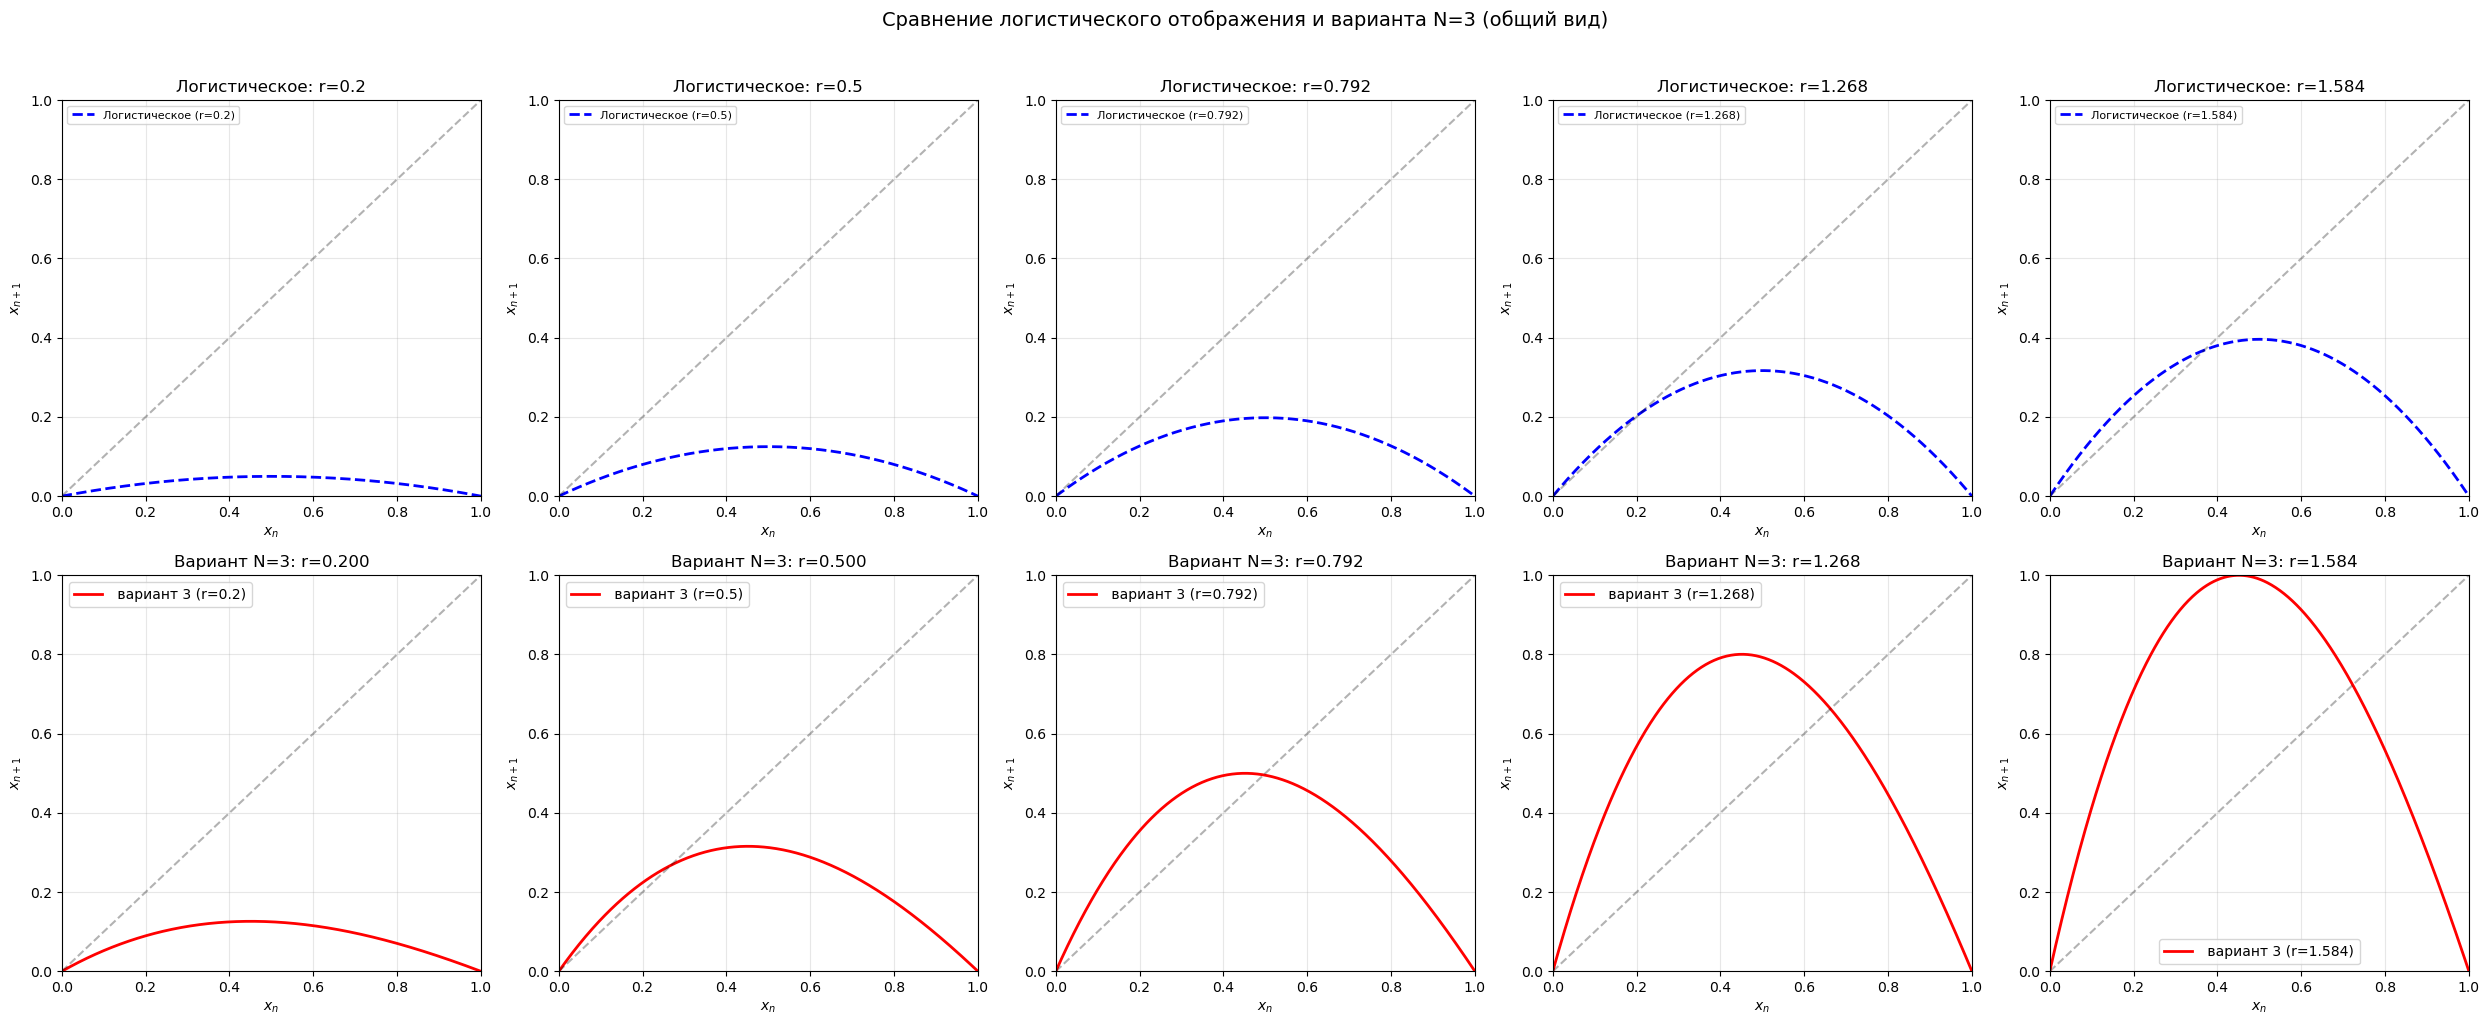

In [12]:
def g(x, r):
    """Функция для варианта N=3: g(x) = r*x*(1-x)*(3-x)"""
    return r * x * (1 - x) * (3 - x)

# Функция для построения графиков
def plot_comparison(r_values, title_suffix=""):
    x = np.linspace(0, 1, 500)
    
    fig, axes = plt.subplots(2, len(r_values), figsize=(5*len(r_values), 10))
    if len(r_values) == 1:
        axes = axes.reshape(2, 1)
    
    for i, r in enumerate(r_values):
        #Логистическое отображение
        ax1 = axes[0, i]
        y_logistic_r = r * x * (1 - x)  
        ax1.plot(x, y_logistic_r, 'b--', linewidth=2, label=f'Логистическое (r={r})')
        ax1.plot(x, x, 'k--', alpha=0.3)
        ax1.set_xlim([0, 1])
        ax1.set_ylim([0, 1])
        ax1.set_xlabel('$x_n$')
        ax1.set_ylabel('$x_{n+1}$')
        ax1.set_title(f'Логистическое: r={r}')
        ax1.grid(True, alpha=0.3)
        ax1.legend(fontsize=8)
        

        ax2 = axes[1, i]
        y_variant = g(x, r)       
        ax2.plot(x, y_variant, 'r-', linewidth=2, label=f' вариант 3 (r={r})')
        ax2.plot(x, x, 'k--', alpha=0.3)
        ax2.set_xlim([0, 1])
        ax2.set_ylim([0, 1])
        ax2.set_xlabel('$x_n$')
        ax2.set_ylabel('$x_{n+1}$')
        ax2.set_title(f'Вариант N=3: r={r:.3f}')
        ax2.grid(True, alpha=0.3)
        ax2.legend()
    
    plt.suptitle(f'Сравнение логистического отображения и варианта N=3 {title_suffix}', 
                 fontsize=14, y=1.02)
    plt.tight_layout()
    plt.show()


r_min = 0
r_max = upper_bound  # ≈1.5848
r_values = [r_min + 0.2, r_min + 0.5, r_max/2, r_max*0.8, r_max]
r_values = [round(r, 3) for r in r_values]
print(f"Будем исследовать r = {r_values}")

plot_comparison(r_values, "(общий вид)")

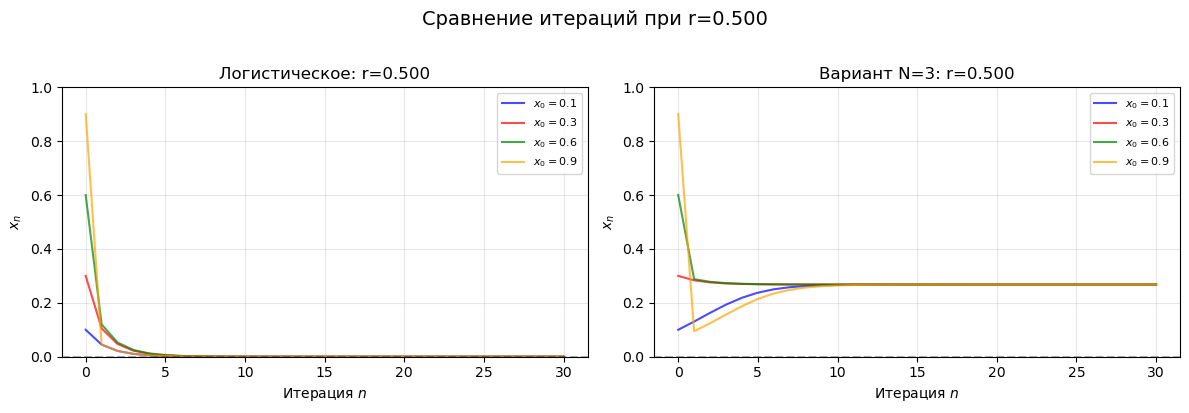

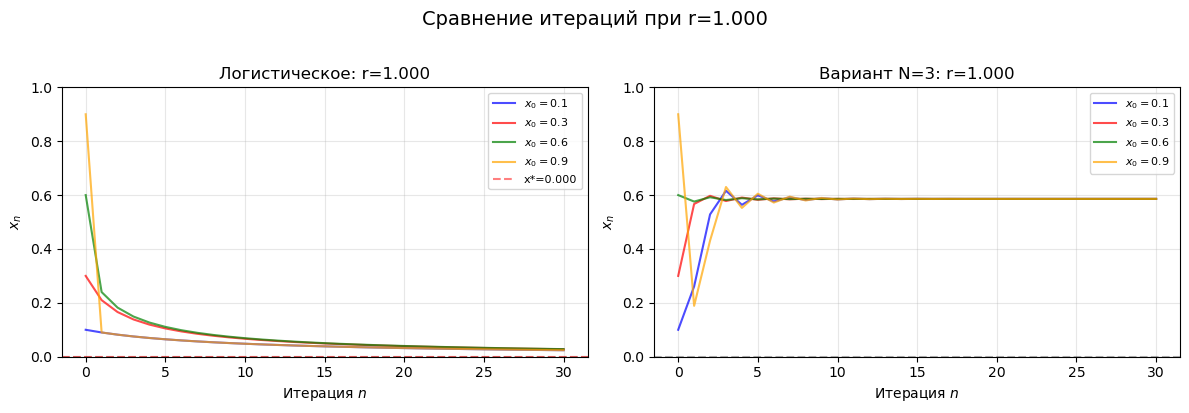

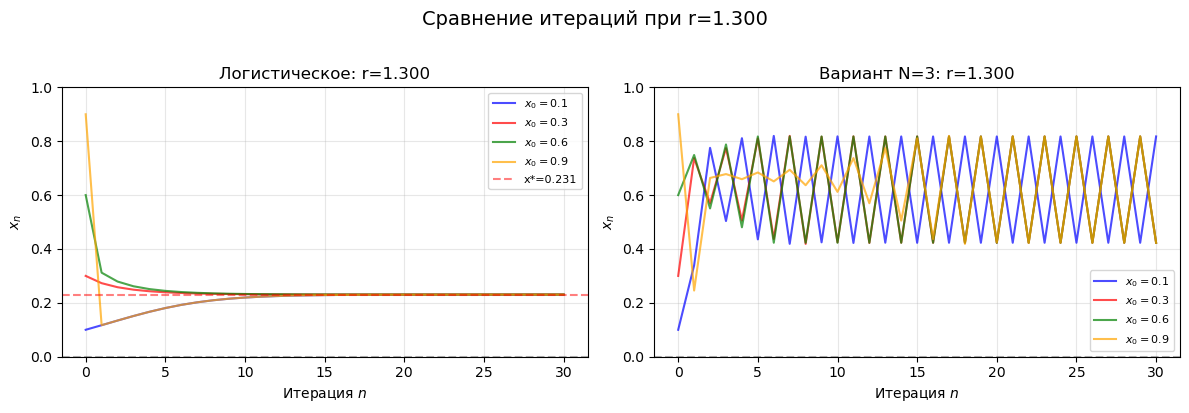

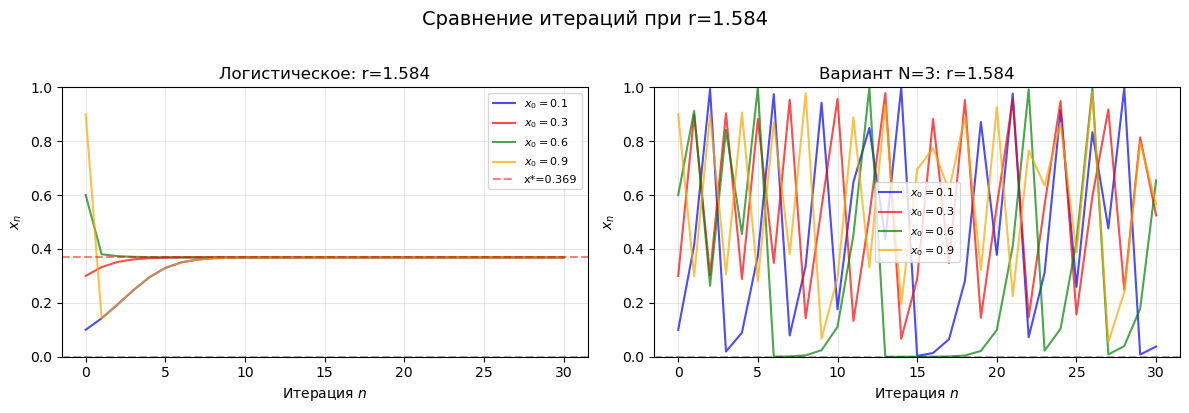

In [20]:
def plot_iterations_comparison(r_values, x0_list, n_iterations=30):
    """
    Сравнение итераций логистического отображения и  варианта 3
    """
    for r in r_values:
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))
        
        colors = ['b', 'r', 'g', 'orange', 'purple']
        
        # Логистическое отображение
        ax1 = axes[0]
        for i, x0 in enumerate(x0_list):
            trajectory = [x0]
            for _ in range(n_iterations):
                # Логистическое: x_{n+1} = r * x_n * (1 - x_n)
                next_val = r * trajectory[-1] * (1 - trajectory[-1])
                trajectory.append(next_val)
            
            ax1.plot(trajectory, '-', color=colors[i % len(colors)], 
                    alpha=0.7, linewidth=1.5, label=f'$x_0={x0}$')
        
        ax1.axhline(y=0, color='k', linestyle='--', alpha=0.3)
        if r >= 1:
            x_star_log = 1 - 1/r
            ax1.axhline(y=x_star_log, color='r', linestyle='--', alpha=0.5, 
                       label=f'x*={x_star_log:.3f}')
        
        ax1.set_xlabel('Итерация $n$')
        ax1.set_ylabel('$x_n$')
        ax1.set_title(f'Логистическое: r={r:.3f}')
        ax1.grid(True, alpha=0.3)
        ax1.legend(fontsize=8)
        ax1.set_ylim([0, 1])
        
        #вариант 3
        ax2 = axes[1]
        for i, x0 in enumerate(x0_list):
            trajectory = [x0]
            for _ in range(n_iterations):
                next_val = g(trajectory[-1], r)
                trajectory.append(next_val)
            
            ax2.plot(trajectory, '-', color=colors[i % len(colors)], 
                    alpha=0.7, linewidth=1.5, label=f'$x_0={x0}$')
        
        ax2.axhline(y=0, color='k', linestyle='--', alpha=0.3)
        ax2.set_xlabel('Итерация $n$')
        ax2.set_ylabel('$x_n$')
        ax2.set_title(f'Вариант N=3: r={r:.3f}')
        ax2.grid(True, alpha=0.3)
        ax2.legend(fontsize=8)
        ax2.set_ylim([0, 1])
        
        plt.suptitle(f'Сравнение итераций при r={r:.3f}', fontsize=14, y=1.02)
        plt.tight_layout()
        plt.show()
        
        
x0_list = [0.1, 0.3, 0.6, 0.9]
characteristic_r = [0.5, 1.0, 1.3, upper_bound]
plot_iterations_comparison(characteristic_r, x0_list)

### Выводы по исследованию варианта N=3

#### 1. Анализ функции:
**Функция:** $g(x) = r \cdot x \cdot (1 - x) \cdot (3 - x)$  
**Диапазон $r$:** $[0; 1.5848]$

**Особенности функции:**
- **Кубическая зависимость** (в отличие от квадратичной логистической)
- **Несимметричная форма** графика
- **Максимум смещен** влево от центра
- **Более крутой спад** при $x \to 1$

#### 2. Сравнение с логистическим отображением:

**СХОДСТВА:**
1. **Общий вид:** Обе функции - унимодальные (один максимум)
2. **Неподвижные точки:** Обе имеют тривиальную точку $x=0$
3. **Поведение при малых $r$:** Обе системы стремятся к 0
4. **Появление нетривиальных точек:** При увеличении $r$ появляются новые неподвижные точки

**РАЗЛИЧИЯ:**
1. **Степень нелинейности:**
   - Логистическое: квадратичная ($x^2$)
   - Наш вариант: кубическая ($x^3$)

2. **Диапазон параметра $r$:**
   - Логистическое: $[0, 4]$ - широкий диапазон
   - Наш вариант: $[0, 1.5848]$ - ограниченный диапазон

3. **Форма графика:**
   - Логистическое: симметричная парабола
   - Наш вариант: несимметричная кубическая кривая

4. **Динамика системы:**
   - Логистическое: демонстрирует полный путь к хаосу
   - Наш вариант: в заданном диапазоне $r$ не достигает хаоса


#### 3. Количественные отличия:

1. **Скорость роста:**
   - В нашем варианте рост быстрее замедляется при приближении к 1
   - Максимальное значение функции меньше, чем в логистическом

2. **Сложность динамики:**
   - В заданном диапазоне наш вариант показывает более "спокойное" поведение
   - Нет перехода к хаосу в пределах допустимых $r$

#### 4. Причины различий:

1. **Математические:**
   - Разная степень полинома (2 vs 3)
   - Разная симметрия функции
   - Разные условия существования неподвижных точек

2. **Физические (для модели популяции):**
   - Более сложный механизм конкуренции
   - Нелинейная зависимость от плотности
   - Дополнительные ограничивающие факторы

#### 5. Общий вывод:

Наш вариант представляет собой **усложненную модель** логистического отображения. 
Добавление множителя $(3-x)$:
- **Усиливает нелинейность** системы
- **Ограничивает возможные режимы** в заданном диапазоне $r$
- **Делает систему более "стабильной"** - менее склонной к хаотическому поведению
- **Улучшает модель** для описания систем с более сложной конкуренцией

**Итог:** Оба отображения демонстрируют богатое поведение, но наш вариант в заданном диапазоне $r$ показывает более ограниченный набор динамических режимов, что может быть полезно для моделирования систем с сильными механизмами саморегуляции.